In [22]:
import sys
sys.path.insert(0, './utils/')
# import feature_selection as fs
import classification_models as cm
import feature_selection as fs

In [2]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split

In [23]:
import importlib
importlib.reload(cm)
importlib.reload(fs)

<module 'feature_selection' from 'E:\\github\\lending_club\\lending_club_loans_default_prediction\\./utils\\feature_selection.py'>

In [4]:
processed_data_filename = 'processed_data_20230517_223610.pickle'
processed_data_path = f'./data/{processed_data_filename}'

df = pd.read_pickle(processed_data_path)

In [5]:
df.shape

(876170, 115)

In [6]:
df.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,...,home_ownership_OWN,home_ownership_RENT,home_ownership_nan,next_pymnt_d_Jan-2016,next_pymnt_d_Mar-2016,next_pymnt_d_nan,verification_status_Source Verified,verification_status_Verified,verification_status_nan,label
0,-1.203909,-0.616915,-1.301341,1.217976,-0.453552,0.381301,-0.093288,-0.013627,-1.400648,-0.424777,...,-0.330426,1.221304,0.0,-0.296551,-0.00881,1.569560,-0.770581,1.430559,0.0,0
1,-1.377846,0.516883,-1.241445,-1.641569,-0.453552,2.633161,-0.093288,-0.013627,-1.400648,-0.424777,...,-0.330426,1.221304,0.0,-0.296551,-0.00881,1.569560,1.297722,-0.699027,0.0,1
2,-1.377846,0.686216,-1.301341,-1.194287,-0.453552,1.507231,-0.093288,-0.013627,-1.400648,-0.424777,...,-0.330426,1.221304,0.0,-0.296551,-0.00881,1.569560,-0.770581,-0.699027,0.0,0
3,-0.582706,0.080052,-0.666436,0.243131,-0.453552,0.381301,0.191932,-0.013627,-0.300568,-0.424777,...,-0.330426,1.221304,0.0,-0.296551,-0.00881,1.569560,1.297722,-0.699027,0.0,0
4,-1.377846,-0.116277,0.255973,-0.019376,-0.453552,-0.744628,0.405847,-0.013627,0.799513,-0.424777,...,-0.330426,1.221304,0.0,-0.296551,-0.00881,-0.637121,1.297722,-0.699027,0.0,0


In [7]:
df.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec',
       ...
       'home_ownership_OWN', 'home_ownership_RENT', 'home_ownership_nan',
       'next_pymnt_d_Jan-2016', 'next_pymnt_d_Mar-2016', 'next_pymnt_d_nan',
       'verification_status_Source Verified', 'verification_status_Verified',
       'verification_status_nan', 'label'],
      dtype='object', length=115)

In [8]:
X_processed = df.drop(columns = 'label')
y = df['label']

In [9]:
# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

INFO:root:Starting feature selection...


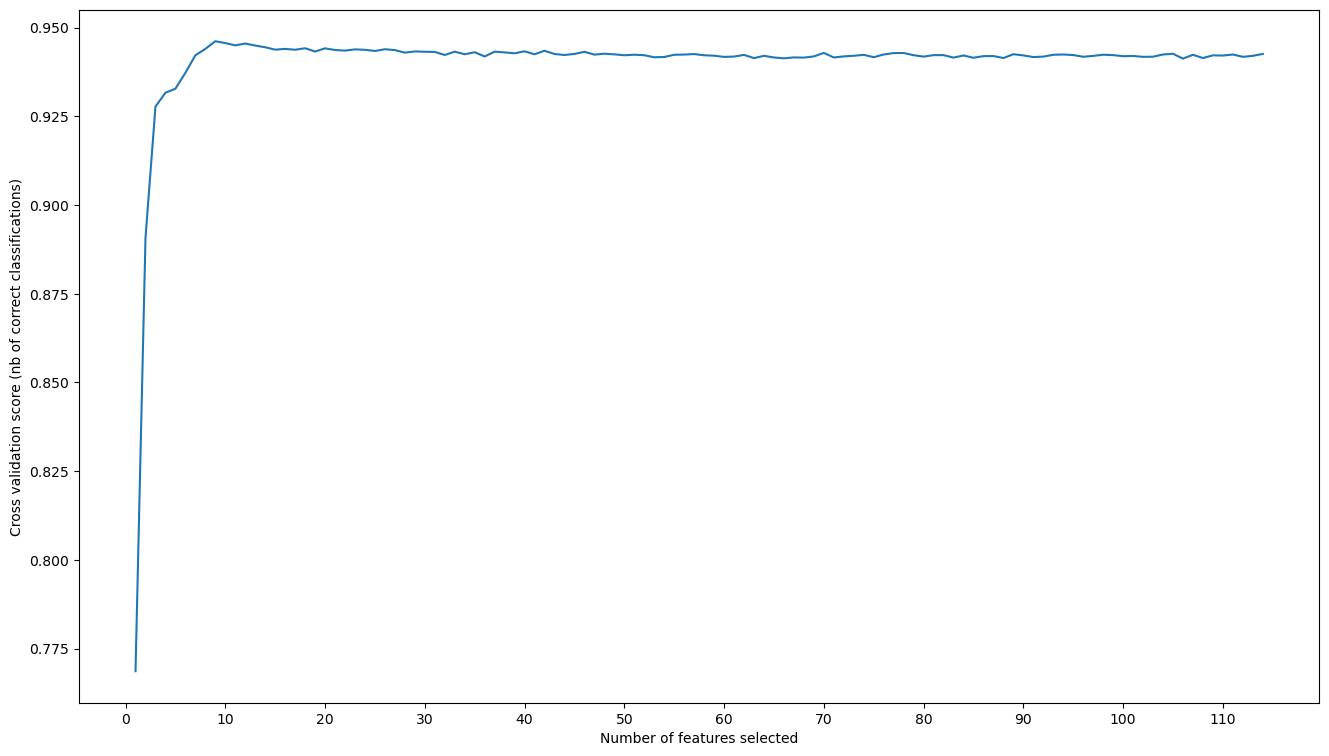

INFO:root:Feature selection completed in 669.19 seconds
INFO:root:Number of features selected: 9
INFO:root:Selected features : ['loan_amnt', 'int_rate', 'revol_bal', 'revol_util', 'out_prncp', 'total_pymnt', 'total_rec_int', 'last_pymnt_amnt', 'tot_cur_bal']


In [28]:
# Perform feature selection - without telling optimal number of features

selected_features = fs2.select_features(X_train=X_train, 
                                       y_train=y_train, 
                                       # n_features_to_select=30,
                                       ml_type='classification',                 
                                       n_samples=50000)

C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Logistic Regression: Done (Execution Time: 0.13 seconds)
KNN: Done (Execution Time: 0.30 seconds)
SVM: Done (Execution Time: 561.65 seconds)
Random Forest: Done (Execution Time: 21.98 seconds)
XGBoost: Done (Execution Time: 6.32 seconds)


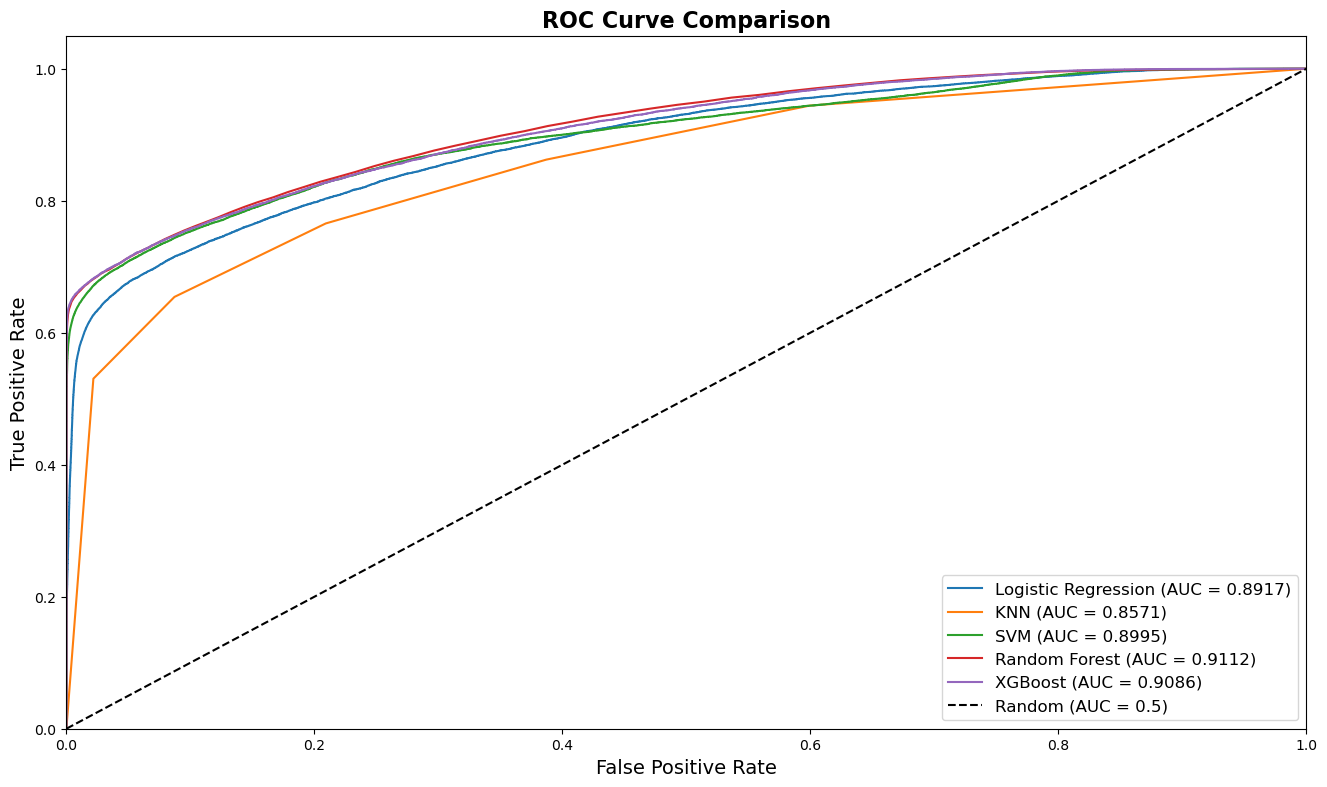

Model Performance Metrics:

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.877124   0.354537  0.734604  0.478257  0.891679
1                  KNN  0.788896   0.233064  0.765570  0.357342  0.857102
2                  SVM  0.935336   0.562724  0.702099  0.624732  0.899494
3        Random Forest  0.941240   0.599966  0.700809  0.646479  0.911194
4              XGBoost  0.951528   0.682297  0.688154  0.685213  0.908616

Best Performing Model:

Model         XGBoost
Accuracy     0.951528
Precision    0.682297
Recall       0.688154
F1 Score     0.685213
ROC AUC      0.908616
Name: 4, dtype: object

Best Performing Model:

Model        Random Forest
Accuracy           0.94124
Precision         0.599966
Recall            0.700809
F1 Score          0.646479
ROC AUC           0.911194
Name: 3, dtype: object

Saved best model (Random Forest) to a pickle file.


In [15]:
best_model = cm.run_classification_models(X_train=X_train[selected_features], 
                                          y_train=y_train, 
                                          X_test=X_test[selected_features], 
                                          y_test=y_test, 
                                          n_samples = 50000, 
                                          scoring_metric='f1 score')

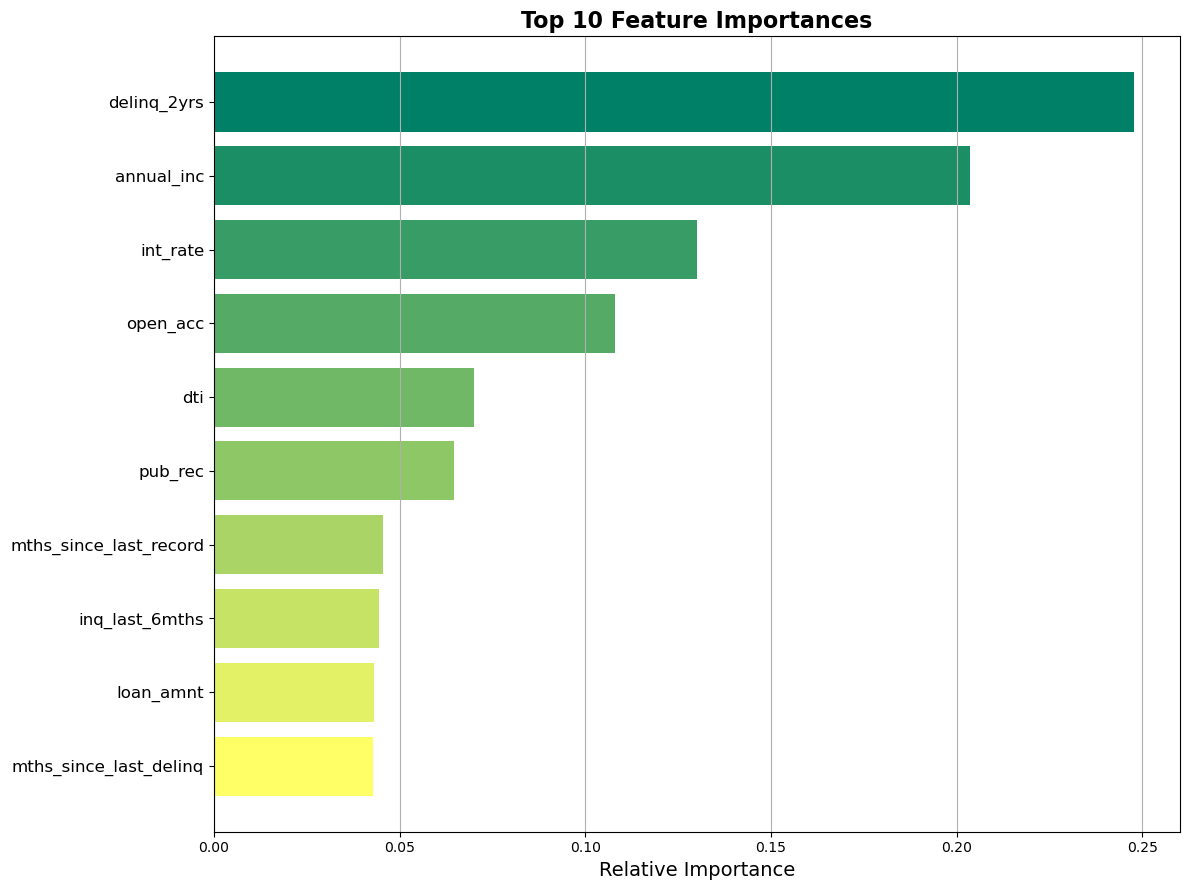

{'delinq_2yrs': 0.24775210319786214,
 'annual_inc': 0.20359264154935558,
 'int_rate': 0.12997482781610975,
 'open_acc': 0.10792252445642578,
 'dti': 0.07002538850458616,
 'pub_rec': 0.06455453851991033,
 'mths_since_last_record': 0.04567036080673535,
 'inq_last_6mths': 0.04441741618667056,
 'loan_amnt': 0.04316409440887337,
 'mths_since_last_delinq': 0.04292610455347101}

In [16]:
cm.plot_top_n_features(best_model, X_train, 10)